In [5]:
include("Create_Sample.jl")
include("MIP_SPLIT.jl")
include("Split.jl")
include("GA.jl")
include("Initial.jl")
include("Mutation.jl")
include("Crossover.jl")
include("Neighborhood.jl")
include("Neighborhood_intra.jl")
include("costs.jl")
include("Draw.jl")
include("Escape.jl")
include("cross_escape.jl")
include("intersection.jl")
include("EAX.jl")
using Plots


function Draw_tour(p1::Vector{Int}, depot::Vector{Float64}, Customers::Matrix{Float64})
    labels = Vector{Vector{String}}()

    x1 = [depot[1]]
    y1 = [depot[2]]
    labels1 = ["0"]
    for i in p1
        push!(x1, Customers[i,1])
        push!(y1, Customers[i,2])
        push!(labels1, string(i))
    end
    push!(x1, depot[1])
    push!(y1, depot[2])

    min_x = minimum(x1)
    min_y = minimum(y1)

    max_x = maximum(x1)
    max_y = maximum(y1)

    magnify = 0.2
    min_x = min_x - magnify*(max_x-min_x)
    max_x = max_x + magnify*(max_x-min_x)
    min_y = min_y - magnify*(max_y-min_y)
    max_y = max_y + magnify*(max_y-min_y)
    tit = "tsp"
    p = plot(x1, y1, marker =:circle, title = tit, label = "tour", xlim=(min_x, max_x), ylim=(min_y, max_y))

    annotate!.(x1[1:length(x1)-1], y1[1:length(y1)-1], text.(labels1, :left,8))
    return p
end

Draw_tour (generic function with 1 method)

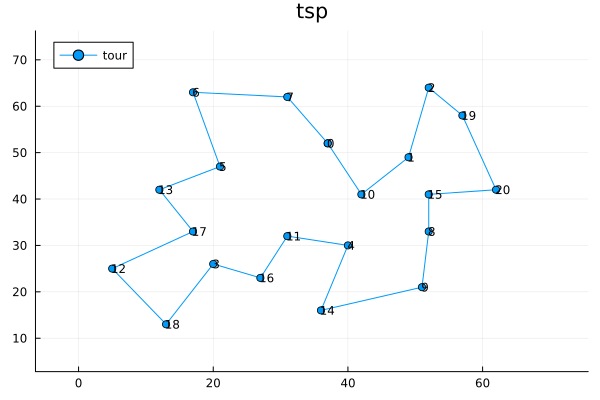

In [61]:
sample_name = :eil51
n = 20
tsp = readTSPLIB(sample_name)
Nodes = tsp.nodes[1:n+1, :]
depot = Nodes[1, :]
Customers = Nodes[2:n+1, :]
T = Calculate_distance_matrices_TSPLIB(1, Nodes)

p1, obj = find_tsp_tour1(T[1:n+1, 1:n+1])
p2, p3, p4 = find_tsp_tour2(T[1:n+1, 1:n+1])
Draw_tour(p1, depot, Customers)



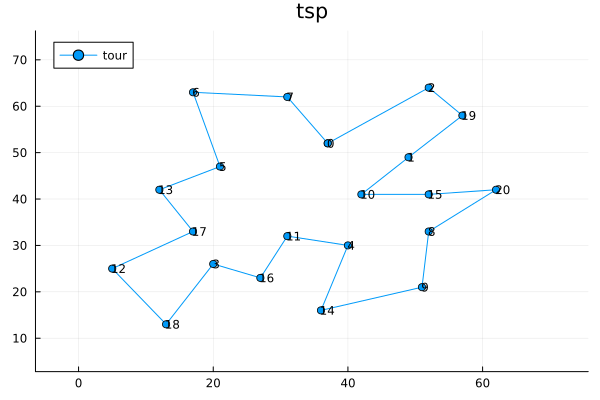

In [62]:
Draw_tour(p3, depot, Customers)

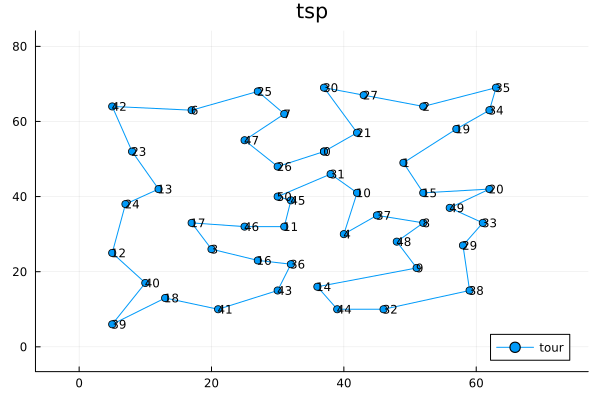

In [25]:
Draw_tour(c, depot, Customers)

In [26]:
for i in c
    print(i," ")
end

26 47 7 25 6 42 23 13 24 12 40 39 18 41 43 36 16 3 17 46 11 45 50 31 10 4 37 8 48 9 14 44 32 38 29 33 49 20 15 1 19 34 35 2 27 30 21 

In [27]:
setdiff(p1, c)

3-element Vector{Int64}:
 28
 22
  5

In [24]:
c = EAX_rand(p1, p3)

14


47-element Vector{Int64}:
 26
 47
  7
 25
  6
 42
 23
 13
 24
 12
 40
 39
 18
  ⋮
 33
 49
 20
 15
  1
 19
 34
 35
  2
 27
 30
 21

In [65]:
AB_Cycles, EA = find_AB_cycles(p1, p2)
select_effective_cycles(AB_Cycles)
Eset = form_Eset_rand(AB_Cycles)
solutions = generate_intermediate_solution(EA, Eset)
subtours = separate_subtours(solutions)
new_tour = modify_intermediate_solution(subtours, T)


7


19-element Vector{Int64}:
 10
 15
  8
  9
 14
  4
 11
 16
 18
 12
 17
  1
 20
 19
  2
 13
  5
  6
  7

In [33]:
AB_Cycles[3]


    

ABcycle(abEdge[abEdge((34, 19), false), abEdge((35, 34), true), abEdge((27, 35), false), abEdge((27, 2), true), abEdge((19, 2), false)], 5)

In [66]:
Eset

7-element Vector{abEdge}:
 abEdge((15, 20), true)
 abEdge((10, 15), false)
 abEdge((1, 10), true)
 abEdge((20, 1), false)
 abEdge((3, 16), true)
 abEdge((18, 3), true)
 abEdge((18, 16), false)

In [43]:
solutions

50-element Vector{Tuple{Int64, Int64}}:
 (0, 21)
 (25, 30)
 (27, 2)
 (35, 34)
 (34, 19)
 (19, 28)
 (28, 1)
 (1, 15)
 (15, 49)
 (49, 20)
 (20, 33)
 (33, 29)
 (29, 8)
 ⋮
 (46, 17)
 (17, 3)
 (3, 16)
 (16, 36)
 (36, 4)
 (4, 37)
 (37, 10)
 (10, 31)
 (31, 0)
 (2, 21)
 (27, 35)
 (25, 30)

In [63]:
# paths = AB_Cycles
delete_idx = Int[]
for (i,path) in enumerate(paths)
    if length(path) == 3
        push!(delete_idx, i)
    end
end
deleteat!(paths, delete_idx)
sort!(paths, by=x->length(x), rev=true)

2-element Vector{Vector{Int64}}:
 [15, 8, 20, 19, 1, 10, 15]
 [2, 1, 10, 0, 2]

2-element Vector{ABcycle}:
 ABcycle(abEdge[abEdge((8, 15), true), abEdge((20, 8), false), abEdge((20, 19), true), abEdge((19, 1), false), abEdge((1, 10), true), abEdge((10, 15), false)], 6)
 ABcycle(abEdge[abEdge((2, 1), true), abEdge((1, 10), false), abEdge((10, 0), true), abEdge((0, 2), false)], 4)

In [70]:


# function generate_intermediate_solution2(tour_A::Vector{Int}, Eset::Vector{abEdge}) #Faster version
#     city = copy(tour_A) .+ 1                       #in paper: Fast EAX Algorithm considering Population...
#     pushfirst!(city, 1)
#     pos = zeros(Int, length(city))
#     for i=1:length(city)
#         pos[city[i]] = i
#     end
    


generate_intermediate_solution (generic function with 1 method)

In [183]:
Eset = form_Eset_rand(AB_Cycles)
solutions = generate_intermediate_solution(EA_, Eset)
subtours = separate_subtours(solutions)
new_tour = modify_intermediate_solution(subtours, T)

20-element Vector{Int64}:
  2
 19
 20
 15
  8
  9
 14
  4
 11
 16
  3
 18
 12
 17
 10
  1
 13
  5
  6
  7

In [176]:
subtours

1-element Vector{Vector{Int64}}:
 [1, 13, 5, 6, 7, 0, 2, 19, 20, 15  …  9, 14, 4, 11, 16, 3, 18, 12, 17, 10]

2-element Vector{Vector{Int64}}:
 [5, 6, 7, 0, 10, 15, 20, 8, 9, 14, 4, 11, 16, 3, 18, 12, 17, 13]
 [1, 2, 19]

In [177]:
function modify_intermediate_solution(subtours::Vector{Vector{Int}}, T::Matrix{Float64})
    while length(subtours) > 1
        sort!(subtours, by=x->length(x), rev=true)
        smallest_tour = pop!(subtours);
        best_n1 = 0
        best_n2 = 0 
        best_n3 = 0
        best_n4 = 0
        min_cost = Inf
        best_tour = 0
        for n1=1:length(smallest_tour)-1
            n3 = n1+1
            cost = - T[smallest_tour[n1]+1, smallest_tour[n3]+1]
            for (i,tour) in enumerate(subtours)
                for j=1:length(tour)-1
                    cost -= T[tour[j]+1, tour[j+1]+1]
                    n2 = j
                    n4 = j+1
                    new_cost = cost + T[smallest_tour[n1]+1, tour[n2]+1] + T[tour[n4]+1, smallest_tour[n3]+1]
                    if new_cost < min_cost
                        min_cost =  new_cost
                        best_tour = i
                        best_n1 = n1
                        best_n2 = n2 
                        best_n3 = n3
                        best_n4 = n4
                    end
                    n2 = j+1
                    n4 = j
                    new_cost = cost + T[smallest_tour[n1]+1, tour[n2]+1] + T[tour[n4]+1, smallest_tour[n3]+1]
                    if new_cost < min_cost
                        min_cost =  new_cost
                        best_tour = i
                        best_n1 = n1
                        best_n2 = n2 
                        best_n3 = n3
                        best_n4 = n4
                    end
                end
            end
        end

        if best_n2 < best_n4
            new_tour = vcat(smallest_tour[1:best_n1], reverse(subtours[best_tour][1:best_n2]), reverse(subtours[best_tour][best_n4:end]), smallest_tour[best_n3:end])
        else
            new_tour = vcat(smallest_tour[1:best_n1], subtours[best_tour][best_n2:end], subtours[best_tour][1:best_n4], smallest_tour[best_n3:end])
        end
        subtours[best_tour] = new_tour
    end
    new_tour = subtours[1]
    i = findfirst(x->x==0, new_tour)
    if i == 1 
        return new_tour[2:end]
    elseif i == length(new_tour)
        return new_tour[1:end-1]
    else
        return vcat(new_tour[i+1:end], new_tour[1:i-1])
    end
end

modify_intermediate_solution (generic function with 1 method)

In [158]:
subtours

1-element Vector{Vector{Int64}}:
 [1, 17, 12, 18, 3, 16, 11, 4, 14, 9  …  20, 15, 10, 0, 7, 6, 5, 13, 2, 19]

In [159]:
a = [23,5,66,9]

a[2:end-1]

2-element Vector{Int64}:
  5
 66

In [392]:
function apply_cycle_to_tour(cycle::ABcycle, EA::Vector{Tuple{Int, Int}})
    cycle_A = Vector{Tuple{Int, Int}}()
    cycle_B = Vector{Tuple{Int, Int}}()
    for link in cycle.edges
        if link.first
            push!(cycle_A, link.edge)
        else
            push!(cycle_B, link.edge)
        end
    end
    temp = setdiff(EA, cycle_A)
    E_set = union(temp, cycle_B)
    return E_set
end

apply_cycle_to_tour (generic function with 2 methods)

In [15]:
cycle = AB_Cycles[1]
cycle_A = Vector{Tuple{Int, Int}}()
cycle_B = Vector{Tuple{Int, Int}}()
for link in cycle.edges
    if link.first
        push!(cycle_A, link.edge)
    else
        push!(cycle_B, link.edge)
    end
end


In [16]:
cycle_A

2-element Vector{Tuple{Int64, Int64}}:
 (20, 19)
 (1, 10)

In [14]:
EA_

21-element Vector{Tuple{Int64, Int64}}:
 (0, 7)
 (7, 6)
 (6, 5)
 (5, 13)
 (13, 17)
 (17, 12)
 (12, 18)
 (18, 3)
 (3, 16)
 (16, 11)
 (11, 4)
 (4, 14)
 (14, 9)
 (9, 8)
 (8, 15)
 (15, 20)
 (20, 19)
 (19, 2)
 (2, 1)
 (1, 10)
 (10, 0)

In [21]:
cycle_B

3-element Vector{Tuple{Int64, Int64}}:
 (15, 20)
 (19, 1)
 (10, 15)

In [22]:
cycle_A

2-element Vector{Tuple{Int64, Int64}}:
 (20, 19)
 (1, 10)

In [19]:
i = 1
index = 1
indices = Int[]
while index <= length(cycle_A)
    if EA_[i] == cycle_A[index]
        push!(indices, i)
        index += 1
    end
    i += 1
end

In [23]:
EA = copy(EA_)
deleteat!(EA, indices)

19-element Vector{Tuple{Int64, Int64}}:
 (0, 7)
 (7, 6)
 (6, 5)
 (5, 13)
 (13, 17)
 (17, 12)
 (12, 18)
 (18, 3)
 (3, 16)
 (16, 11)
 (11, 4)
 (4, 14)
 (14, 9)
 (9, 8)
 (8, 15)
 (15, 20)
 (19, 2)
 (2, 1)
 (10, 0)

In [24]:
cycle_B

3-element Vector{Tuple{Int64, Int64}}:
 (15, 20)
 (19, 1)
 (10, 15)

In [411]:
using LightGraphs

# Define the edges of the graph
edges = [(1,2), (2,3), (3,4), (4,5), (5,1), (2,5)]

# Create a graph object from the edges
g = SimpleGraph(length(edges))
for edge in edges
    add_edge!(g, edge[1], edge[2])
end

# Find all connected components (subtours) in the graph
subtours = connected_components(g)

# Print the subtours
for tour in subtours
    println("Subtour: ", tour)
end

Subtour: [1, 2, 3, 4, 5]
Subtour: [6]


In [410]:
using Pkg
Pkg.add("LightGraphs")

   Resolving package versions...
   Installed SimpleTraits ── v0.9.4
   Installed Inflate ─────── v0.1.3
   Installed ArnoldiMethod ─ v0.1.0
   Installed LightGraphs ─── v1.3.5
    Updating `C:\Users\sasanm\.julia\environments\v1.6\Project.toml`
  [093fc24a] + LightGraphs v1.3.5
    Updating `C:\Users\sasanm\.julia\environments\v1.6\Manifest.toml`
  [ec485272] + ArnoldiMethod v0.1.0
  [d25df0c9] + Inflate v0.1.3
  [093fc24a] + LightGraphs v1.3.5
  [699a6c99] + SimpleTraits v0.9.4
Precompiling project...
  ✓ Inflate
  ✓ SimpleTraits
  ✓ ArnoldiMethod
  ✓ GR_jll
  ✓ LightGraphs
  ✓ GR
  ✓ Plots
  7 dependencies successfully precompiled in 50 seconds (188 already precompiled, 66 skipped during auto due to previous errors)
  3 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


Draw_Eset (generic function with 1 method)

In [364]:
x,y = Nodes[2,:]

2-element Vector{Float64}:
 49.0
 49.0

In [203]:
temp1 = copy(p1)
temp2 = copy(p2)
push!(temp1, 0)
pushfirst!(temp1, 0)
push!(temp2, 0)
pushfirst!(temp2, 0)

EA = [(temp1[i], temp1[i+1]) for i in 1:length(temp1)-1]
EB = [(temp2[i], temp2[i+1]) for i in 1:length(temp2)-1];

Draw_cycles (generic function with 1 method)

In [205]:
EA

6-element Vector{Tuple{Int64, Int64}}:
 (0, 4)
 (4, 5)
 (5, 3)
 (3, 1)
 (1, 2)
 (2, 0)

In [143]:
@time begin
    collect(Iterators.flatten(EA))
end

  0.000009 seconds (2 allocations: 160 bytes)

8-element Vector{Int64}:
  7
  5
  5
  2
  4
 10
  1
  0

In [138]:
@time begin
    S = Int[]
    for a in EA
        push!(S, a[1])
        push!(S, a[2])
    end
    S = collect(Set(S))
end

  0.000039 seconds (17 allocations: 1.078 KiB)


7-element Vector{Int64}:
  5
  4
  0
  7
  2
 10
  1

In [189]:
using PyPlot

function Draw_Eset(E_Set::Vector{Tuple{Int64, Int64}}, Nodes::Matrix{Float64})
# Define the coordinates of the endpoints for each line
lines = [[(0,0),(1,1)], [(1,1),(2,3)], [(2,3),(4,1)]]

    # Create a figure and axis object
    fig, ax = subplots()

    # Loop over the lines and plot each one
    for line in E_Set
        node1 = line[1]+1
        node2 = line[2]+1
        x1, y1 = Nodes[node1, :]
        x2, y2 = Nodes[node2, :]
        ax.plot([x1, x2], [y1, y2])
    end

    # Show the plot
    show()
end

function Draw_tour(p1::Vector{Int}, depot::Vector{Float64}, Customers::Matrix{Float64})
    labels = Vector{Vector{String}}()

    x1 = [depot[1]]
    y1 = [depot[2]]
    labels1 = ["0"]
    for i in p1
        push!(x1, Customers[i,1])
        push!(y1, Customers[i,2])
        push!(labels1, string(i))
    end
    push!(x1, depot[1])
    push!(y1, depot[2])

    min_x = minimum(x1)
    min_y = minimum(y1)

    max_x = maximum(x1)
    max_y = maximum(y1)

    magnify = 0.2
    min_x = min_x - magnify*(max_x-min_x)
    max_x = max_x + magnify*(max_x-min_x)
    min_y = min_y - magnify*(max_y-min_y)
    max_y = max_y + magnify*(max_y-min_y)
    tit = "tsp"
    p = plot(x1, y1, marker =:circle, title = tit, label = "tour", xlim=(min_x, max_x), ylim=(min_y, max_y))

    annotate!.(x1[1:length(x1)-1], y1[1:length(y1)-1], text.(labels1, :left,8))
    return p
end

function Draw_cycles(cycles::Vector{Vector{Int}}, Nodes::Matrix{Float64})

    x = Vector{Vector{Float64}}()
    y = Vector{Vector{Float64}}()
    labels = Vector{Vector{String}}()

    min_x = Inf
    max_x = 0.0
    min_y = Inf
    max_y = 0.0
    for cycle in cycles
        x1 = Float64[]
        y1 = Float64[]
        labels1 = String[]
        for i in cycle
            push!(x1, Nodes[i+1,1])
            push!(y1, Nodes[i+1,2])
            push!(labels1, string(i))
        end

        push!(x, x1)
        push!(y, y1)
        push!(labels, labels1)
        if minimum(x1) < min_x
            min_x = minimum(x1)
        end
        if minimum(y1) < min_y
            min_y = minimum(y1)
        end
        if maximum(x1) > max_x
            max_x = maximum(x1)
        end
        if maximum(y1) > max_y
            max_y = maximum(y1)
        end
    end
    magnify = 0.2
    min_x = min_x - magnify*(max_x-min_x)
    max_x = max_x + magnify*(max_x-min_x)
    min_y = min_y - magnify*(max_y-min_y)
    max_y = max_y + magnify*(max_y-min_y)
    tit = "Cycels"
    p = plot(x[1], y[1], marker =:circle, title = tit, label = "c1", xlim=(min_x, max_x), ylim=(min_y, max_y))
    for i=1:length(x)
        annotate!.(x[i][1:length(x[i])], y[i][1:length(y[i])], text.(labels[i], :left,8))
    end
    for i=2:length(x)
        p = plot!(x[i], y[i], marker =:circle, label = "c"*string(i))
    end 
    return p
end

# function Draw_Eset(E_Set::Vector{Tuple{Int64, Int64}}, Nodes::Matrix{Float64})

Draw_cycles (generic function with 1 method)